# Data exploration about the recent history of the Olympic Games

Hey, thanks for viewing my Kernel!

**If you like my work, please, leave an upvote: it will be really appreciated and it will motivate me in offering more content to the Kaggle community ! :)**

Today, we will explore a dataset on the modern Olympic Games, including all the Games from Athens 1896 to Rio 2016. 

The data have been scraped from www.sports-reference.com in May 2018.

**Content**

The file athlete_events.csv contains 271116 rows and 15 columns; Each row corresponds to an individual athlete competing in an individual Olympic event (athlete-events). 
The columns are the following:

1. ID - Unique number for each athlete;
2. Name - Athlete's name;
3. Sex - M or F;
4. Age - Integer;
5. Height - In centimeters;
6. Weight - In kilograms;
7. Team - Team name;
8. NOC - National Olympic Committee 3-letter code;
9. Games - Year and season;
10. Year - Integer;
11. Season - Summer or Winter;
12. City - Host city;
13. Sport - Sport;
14. Event - Event;
15. Medal - Gold, Silver, Bronze, or NA.

![Picture by Time.com](https://timedotcom.files.wordpress.com/2018/02/180209-olympic-medal-worth.jpg?quality=85)

# Changelog 

* 24/08/2018 - New section added: what is the median height/weight of an Olympic medalist? 

* 25/08/2018 - Inserted a new section "Evolution of the Olympics over time" thanks to [the great suggestion Rodolfo Mendes gave me in my question in the Q&A forum](https://www.kaggle.com/questions-and-answers/63823#375542).

* 26/08/2018 - Added the sections 'Variation of age and weight along time' with 4 new graphs (boxplot and pointplot).

* 27/08/2018 - Added the section 'Variation of height along time' with 2 new pointplots, added a short analysis of age over time for Italian athletes.

* 28/08/2018 - Added a new section about change in height and weight for Gymnasts over time.

* 29/08/2018 - Added a new section about change in height and weight for Lifters over time, added index of content at the beginning of the kernel.

# Index of content

1. Importing the modules.
2. Data importing.
3. Collecting information about the two dataset.
4. Joining the dataframes.
5. Distribution of the age of gold medalists.
6. Women in Athletics.
7. Medals per country.
8. Disciplines with the greatest number of Gold Medals.
9. What is the median height/weight of an Olympic medalist?
10. Evolution of the Olympics over time.

    10.1 Variation of male/female athletes over time (Summer Games).

    10.2 Variation of age along time.

    10.3 Variation of weight along time.

    10.4 Variation of height along time.

    10.5 Variation of age for Italian athletes.

    10.6 Variation of height/weight along time for particular disciplines.

    10.6.1 Gymnastic.

    10.6.2 Weightlifting.

11. Conclusions.

# 1. Importing the modules 

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

import os
print(os.listdir("../input"))

# 2. Data Importing

In [ ]:
data = pd.read_csv('../input/athlete_events.csv')
regions = pd.read_csv('../input/noc_regions.csv')

# 3. Collecting information about the two dataset

We are going to:

1. Review the first lines of the data;
2. Use the describe and info functions to collect statistical information, datatypes, column names and other information.

In [ ]:
data.head(5)

In [ ]:
data.describe()

In [ ]:
data.info()

In [ ]:
regions.head(5)

# 4. Joining the dataframes

We can now join the two dataframes using as key the NOC column with the Pandas 'Merge' function ([see documentation](https://pandas.pydata.org/pandas-docs/stable/merging.html))

In [ ]:
merged = pd.merge(data, regions, on='NOC', how='left')

Let's see the result:

In [ ]:
merged.head()

# 5. Distribution of the age of gold medalists

Let's start creating a new dataframe including only gold medalists.

In [ ]:
goldMedals = merged[(merged.Medal == 'Gold')]
goldMedals.head()

I would like to have a plot of the Age to see the distribution but I need to check first if the Age column contains NaN values..

In [ ]:
goldMedals.isnull().any()

..and it does.

Let's take only the values that are different from NaN.

In [ ]:
goldMedals = goldMedals[np.isfinite(goldMedals['Age'])]

We can now create a countplot to see the result of our work:

In [ ]:
plt.figure(figsize=(20, 10))
plt.tight_layout()
sns.countplot(goldMedals['Age'])
plt.title('Distribution of Gold Medals')

It seems that we have people with Age greater that 50 with a gold medal: Let's know more about those people!

In [ ]:
goldMedals['ID'][goldMedals['Age'] > 50].count()

65 people: Great! 
But which disciplines allows you to land a gold medal after your fifties?

We will now create a new dataframe called masterDisciplines in which we will insert this new set of people and then create a visualization with it.

In [ ]:
masterDisciplines = goldMedals['Sport'][goldMedals['Age'] > 50]

In [ ]:
plt.figure(figsize=(20, 10))
plt.tight_layout()
sns.countplot(masterDisciplines)
plt.title('Gold Medals for Athletes Over 50')

It seems that our senior gold medalists are shooters, archers, sailors and, above all, horse riders!

It makes sense: I cannot imagine a sprinter making 100 meters in 10 seconds at 55, but who knows!

# 6. Women in Athletics

Studying the data we can try to understand how much medals we have only for women in the recent history of the Summer Games.

![Credits to the Daily Mail for the picture](https://i.dailymail.co.uk/i/pix/2012/08/13/article-2187749-147C70BD000005DC-253_964x608.jpg)

Let's create a filtered datased:

In [ ]:
womenInOlympics = merged[(merged.Sex == 'F') & (merged.Season == 'Summer')]

Done. Let's now review our work:

In [ ]:
womenInOlympics.head(10)

To plot the curve over time, let's create a plot in which we put the year (on the x-axis) and count of the number of medals per edition of the games (consider that we will have more medals for the same athlete).

In [ ]:
sns.set(style="darkgrid")
plt.figure(figsize=(20, 10))
sns.countplot(x='Year', data=womenInOlympics)
plt.title('Women medals per edition of the Games')

Usually I cross-check the data: below I tried to review only the medalists for the 1900 Summer edition to see if the visualization is correct. 

In [ ]:
womenInOlympics.loc[womenInOlympics['Year'] == 1900].head(10)

Okay, let's count the rows (same code as above adding the count() function and filtering only for ID).

In [ ]:
womenInOlympics['ID'].loc[womenInOlympics['Year'] == 1900].count()

So we have 33 records (with repetitions, for example 'Marion Jones (-Farquhar)' won a medal both for Tennis Women's Singles and Tennis Mixed Doubles - To be sure I cross-checked also with [Wikipedia](https://en.wikipedia.org/wiki/Marion_Jones_Farquhar) and the outcome seems correct).

# 7. Medals per country

Let's now review the top 5 gold medal countries:

In [ ]:
goldMedals.region.value_counts().reset_index(name='Medal').head(5)

Let's plot this:

In [ ]:
totalGoldMedals = goldMedals.region.value_counts().reset_index(name='Medal').head(5)
g = sns.catplot(x="index", y="Medal", data=totalGoldMedals,
                height=6, kind="bar", palette="muted")
g.despine(left=True)
g.set_xlabels("Top 5 countries")
g.set_ylabels("Number of Medals")
plt.title('Medals per Country')

The USA seems to be the most winning country.

But which are the most awarded disciplines of American Athletes?

# 8. Disciplines with the greatest number of Gold Medals

Let's create a dataframe to filter the gold medals only for the USA.

In [ ]:
goldMedalsUSA = goldMedals.loc[goldMedals['NOC'] == 'USA']

Done! Now, we can count the medals per discipline:

In [ ]:
goldMedalsUSA.Event.value_counts().reset_index(name='Medal').head(20)

And, of course, basketball is the leading discipline!

Maybe a part of the success is due to the people below.. maybe.

![](http://www.elsitodesandro.com/wp-content/uploads/2016/11/dreamteam-1030x781.jpg)

But hey, wait a minute: We are reviewing a list of athletes, but maybe we are counting the medal of each member of the team instead of counting the medals per team.

Let's slice the dataframe using only the data of male athletes to better review it:

In [ ]:
basketballGoldUSA = goldMedalsUSA.loc[(goldMedalsUSA['Sport'] == 'Basketball') & (goldMedalsUSA['Sex'] == 'M')].sort_values(['Year'])

In [ ]:
basketballGoldUSA.head(15)

What we supposed is true: the medals are not grouped by Edition/Team but we were counting the gold medals of each member of the team!

Let's proceed grouping by year the athletes - the idea is to create a new dataframe to make a pre-filter using only the first record for each member of the team.

In [ ]:
groupedBasketUSA = basketballGoldUSA.groupby(['Year']).first()
groupedBasketUSA

Let's count the records obtained:

In [ ]:
groupedBasketUSA['ID'].count()

And so we have 15 records - cross-checking with the [related Wikipedia page](https://en.wikipedia.org/wiki/United_States_men%27s_national_basketball_team) it seems that our filtering operation has obtained the desired result!

# 9. What is the median height/weight of an Olympic medalist? 

Let's try to plot a scatterplot of height vs weight to see the distribution of values (without grouping by discipline).

First of all, we have to take again the goldMedals dataframe

In [ ]:
goldMedals.head()

We can see that we have NaN values both in height and weight columns.

At this point, we can act as follows:

1. Using only the rows that has a value in the Height and Weight columns;
2. Replace the value with the mean of the column.

Solution 2 in my opinion it is not the best way to go: we are talking about data of athletes of different ages and different disciplines (that have done different training).

Let's go with solution 1.

The first thing to do is to collect general information about the dataframe that we have to use: goldMedals.

In [ ]:
goldMedals.info()

Okay, we have more than 13.000 rows.

We will now create a dataframe filtering only the rows that has the column Height and Weight populated.

In [ ]:
notNullMedals = goldMedals[(goldMedals['Height'].notnull()) & (goldMedals['Weight'].notnull())]

Okay, let's see the first rows of the dataset and the new information with the info function.

In [ ]:
notNullMedals.head()

In [ ]:
notNullMedals.info()

Okay, we have 10.000 rows now, let's create the scatterplot:

In [ ]:
plt.figure(figsize=(12, 10))
ax = sns.scatterplot(x="Height", y="Weight", data=notNullMedals)
plt.title('Height vs Weight of Olympic Medalists')

The vast majority of the samples show a linear relation between height and weight (the more the weight, the more the height).

We have exceptions and I am willing to know more!

For example, let's see which is the athlete that weighs more than 160 kilograms

In [ ]:
notNullMedals.loc[notNullMedals['Weight'] > 160]

Weighlifters: that makes sense :)

# 10. Evolution of the Olympics over time

A great thank you to [Rodolfo Mendes](https://www.kaggle.com/rodolfomendes) for giving me the idea for this paragraph.

We will now try to answer the following questions:

* How the number of athletes/countries varied along time ?
* How the proportion of Men/Women varied with time ?
* How about mean age, weight and height along time ?

*** 10.1 Variation of male/female athletes over time (Summer Games) ***

We will now create two dataframes dividing the population of our dataset using Sex and Season (we would like to review only the summer games)

In [ ]:
MenOverTime = merged[(merged.Sex == 'M') & (merged.Season == 'Summer')]
WomenOverTime = merged[(merged.Sex == 'F') & (merged.Season == 'Summer')]

Done, let's check the head of one of the new dataframes to see the result:

In [ ]:
MenOverTime.head()

Okay, at this time we are ready to create the plots.

The first one is for men, the second for women:

In [ ]:
part = MenOverTime.groupby('Year')['Sex'].value_counts()
plt.figure(figsize=(20, 10))
part.loc[:,'M'].plot()
plt.title('Variation of Male Athletes over time')

In [ ]:
part = WomenOverTime.groupby('Year')['Sex'].value_counts()
plt.figure(figsize=(20, 10))
part.loc[:,'F'].plot()
plt.title('Variation of Female Athletes over time')

What I immediately saw is that for women:

1. We have a steep increase in the population;
2. The grow is constant.

On the other hand, the grow for men seems less strong:

1. After the 1990 we can see a relevant decrease in the number of male athletes at the summer games;
2. The growth has slowly restarted recently.

*** 10.2 Variation of age along time ***

Another really interesting question can be: *"How the age of the athletes has changed over time?"*

Let's use a [box plot](https://en.wikipedia.org/wiki/Box_plot): In descriptive statistics, a box plot or boxplot is a method for graphically depicting groups of numerical data through their quartiles. 

Box plots may also have lines extending vertically from the boxes (whiskers) indicating variability outside the upper and lower quartiles, hence the terms box-and-whisker plot and box-and-whisker diagram. 

Outliers may be plotted as individual points. Box plots are non-parametric: they display variation in samples of a statistical population without making any assumptions of the underlying statistical distribution. 

The spacings between the different parts of the box indicate the degree of dispersion (spread) and skewness in the data, and show outliers. 

In addition to the points themselves, they allow one to visually estimate various L-estimators, notably the interquartile range, midhinge, range, mid-range, and trimean. 

Box plots can be drawn either horizontally or vertically. Box plots received their name from the box in the middle. 

In [ ]:
plt.figure(figsize=(20, 10))
sns.boxplot('Year', 'Age', data=MenOverTime)
plt.title('Variation of Age for Male Athletes over time')

What is strange for me is the age of some athletes in the games between the 1924 and the 1948: let's check all the people with age greater than 80.

In [ ]:
MenOverTime.loc[MenOverTime['Age'] > 80].head(10)

To be honest, I did not know that the Olympics included Art Competitions!

After a brief research, [I discovered more](https://en.wikipedia.org/wiki/Art_competitions_at_the_Summer_Olympics): Art competitions formed part of the modern Olympic Games during its early years, from 1912 to 1948. The competitions were part of the original intention of the Olympic Movement's founder, Pierre de Frédy, Baron de Coubertin. Medals were awarded for works of art inspired by sport, divided into five categories: architecture, literature, music, painting, and sculpture. 

Okay, after this brief parenthesis we can do the same graph for women:

In [ ]:
plt.figure(figsize=(20, 10))
sns.boxplot('Year', 'Age', data=WomenOverTime)
plt.title('Variation of Age for Female Athletes over time')

Interesting points for me:

* Generally, the age distribution starts has a lower minimum and a lower maximum;
* In 1904 the age distribution is strongly different from the other Olympics: let's know more about this point:

In [ ]:
WomenOverTime.loc[WomenOverTime['Year'] == 1904]

***10.3 Variation of weight along time ***

We will now try using a pointplot to visualize the variation in weight over athletes.

The first graph will show data for men, the second for women:

In [ ]:
plt.figure(figsize=(20, 10))
sns.pointplot('Year', 'Weight', data=MenOverTime)
plt.title('Variation of Weight for Male Athletes over time')

In [ ]:
plt.figure(figsize=(20, 10))
sns.pointplot('Year', 'Weight', data=WomenOverTime)
plt.title('Variation of Weight for Female Athletes over time')

What we can see is that it seems that we do not have data for women before 1924.

Let's try filtering all the women athletes for that period to review this point:

In [ ]:
womenInOlympics.loc[womenInOlympics['Year'] < 1924].head(20)

Okay, the first values seems all NaN (Not a number) so the information is correct.

***10.4 Variation of height along time***

Using the same pointplot (with a different palette) we can plot the weight change along time.

The first graph will show the information for men, the second for women:

In [ ]:
plt.figure(figsize=(20, 10))
sns.pointplot('Year', 'Height', data=MenOverTime, palette='Set2')
plt.title('Variation of Height for Male Athletes over time')

In [ ]:
plt.figure(figsize=(20, 10))
sns.pointplot('Year', 'Height', data=WomenOverTime, palette='Set2')
plt.title('Variation of Height for Female Athletes over time')

What we may see:

* For both men and women, the height is incrementing over time but it is decreasing between the 2012 and the 2016.
* For women we have a peak between 1928 and 1948, let's deepen this point:

In [ ]:
WomenOverTime.loc[(WomenOverTime['Year'] > 1924) & (WomenOverTime['Year'] < 1952)].head(10)

The list is full of NaN values (that is why the data for the period deviates from what expected).

***10.5 Variation of age for Italian athletes *** 

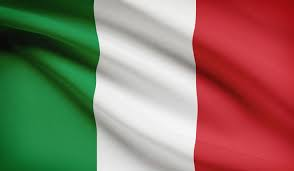

Let's see the age over time for Italian athletes.

I will start reviewing the dataset MenOverTime to refresh the columns:

In [ ]:
MenOverTime.head(5)

Let's create a sliced dataframe including only male athletes from Italy

In [ ]:
itMenOverTime = MenOverTime.loc[MenOverTime['region'] == 'Italy']

Let's review the first rows:

In [ ]:
itMenOverTime.head(5)

Okay, now we can plot the change over time:

In [ ]:
sns.set(style="darkgrid")
plt.figure(figsize=(20, 10))
sns.countplot(x='Year', data=itMenOverTime, palette='Set2')
plt.title('Variation of Age for Italian Male Athletes over time')

Okay, we can quickly do the same operation for women:

In [ ]:
itWomenOverTime = WomenOverTime.loc[WomenOverTime['region'] == 'Italy']

In [ ]:
sns.set(style="darkgrid")
plt.figure(figsize=(20, 10))
sns.countplot(x='Year', data=itWomenOverTime, palette='Set2')
plt.title('Variation of Age for Italian Female Athletes over time')

What we see is that the Italian women participation is increasing, while the men participation is decreasing starting from the 2008 games.

***10.6 Variation of height/weight along time for particular disciplines***

**10.6.1 Gymnastic**

Let's see the trend of height/weight for Gymnasts, starting from men and then women following the usual approach:

In [ ]:
MenOverTime.head(5)

Let's first of all isolate all the discipline of the Olympics dataframe.

My idea is to see if Gymnastics is called differently or if there is any typo.

In [ ]:
MenOverTime['Sport'].unique().tolist()

Okay, the string to use to filter is 'Gymnastics': let's create two new dataframes for men and women.

In [ ]:
gymMenOverTime = MenOverTime.loc[MenOverTime['Sport'] == 'Gymnastics']
gymWomenOverTime = WomenOverTime.loc[WomenOverTime['Sport'] == 'Gymnastics']

Okay: let's now create our plot for male and female athletes and then we can make our observations

In [ ]:
plt.figure(figsize=(20, 10))
sns.barplot('Year', 'Weight', data=gymMenOverTime)
plt.title('Weight over year for Male Gymnasts')

In [ ]:
plt.figure(figsize=(20, 10))
sns.barplot('Year', 'Height', data=gymMenOverTime)
plt.title('Height over year for Male Gymnasts')

In [ ]:
plt.figure(figsize=(20, 10))
sns.barplot('Year', 'Weight', data=gymWomenOverTime)
plt.title('Weight over year for Female Gymnasts')

In [ ]:
plt.figure(figsize=(20, 10))
sns.barplot('Year', 'Height', data=gymWomenOverTime)
plt.title('Height over year for Female Gymnasts')

A few things I noticed:
* The weight for female Gymnasts has go down for 60 to 50 kilograms on average;
* The weight for men has been more or less stable since 1964;
* The height is more stable for both men and women.

Also, men weight data from 1924 seems missing: let's check.

In [ ]:
gymMenOverTime['Weight'].loc[gymMenOverTime['Year'] == 1924].isnull().all()

It seems that we do not have any information about the athletes in 1924.

**10.6.2 Weightlifting**

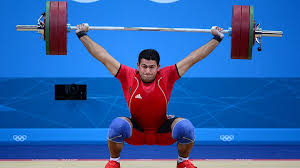

Let's work on an analysis similar to what we have done for Gymnastics also for the Lifters.

We can start creating a new, dedicated dataframe.

In [ ]:
wlMenOverTime = MenOverTime.loc[MenOverTime['Sport'] == 'Weightlifting']
wlWomenOverTime = WomenOverTime.loc[WomenOverTime['Sport'] == 'Weightlifting']

Okay: let's now create our plot for male and female athletes and then we can make our observations

In [ ]:
plt.figure(figsize=(20, 10))
sns.pointplot('Year', 'Weight', data=wlMenOverTime, palette='Set2')
plt.title('Weight over year for Male Lifters')

In [ ]:
plt.figure(figsize=(20, 10))
sns.pointplot('Year', 'Height', data=wlMenOverTime, palette='Set2')
plt.title('Height over year for Male Lifters')

In [ ]:
plt.figure(figsize=(20, 10))
sns.pointplot('Year', 'Weight', data=wlWomenOverTime)
plt.title('Weight over year for Female Lifters')

In [ ]:
plt.figure(figsize=(20, 10))
sns.pointplot('Year', 'Height', data=wlWomenOverTime)
plt.title('Height over year for Female Lifters')

It seems that we do not have data for female athletes before the 2000 Games.

Let's check this point.

In [ ]:
wlWomenOverTime['Weight'].loc[wlWomenOverTime['Year'] < 2000].isnull().all()

Our observation seems correct.

# 11. Conclusions

**First of all, thank you so much for reading! If you liked my work, please, do not forget to leave an upvote: it will be really appreciated and it will motivate me in offering more content to the Kaggle community ! :)**

I will review and update the kernel periodically following your suggestions or if I want to discover something new (see the changelog at the beginning with the history of the updates).

If you want to ask something, feel free to comment!